Build a neural network to classify images as either cats or dogs.

Download the Cats vs. Dogs dataset, which typically contains labeled images of cats and dogs.

Build a NN with:

	Neural Network layers with activation functions like ReLU.

	Flatten layer to transition from convolutional layers to fully connected layers.

	Dense layers with appropriate activation functions.

	Compile the model with binary crossentropy loss (since it's a binary classification task) and an optimizer of your choice.

	Train the model on the training set for a reasonable number of epochs.

	Evaluate the model on the testing set and analyze its performance.


https://www.kaggle.com/datasets/salader/dogs-vs-cats

download dataset from the above link

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 5000 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // 32)

Epoch 1/10
625/625 [==============================] - 1288s 2s/step - loss: 0.6895 - accuracy: 0.5483 - val_loss: 0.6786 - val_accuracy: 0.5811
Epoch 2/10
625/625 [==============================] - 1280s 2s/step - loss: 0.6471 - accuracy: 0.6273 - val_loss: 0.5708 - val_accuracy: 0.7139
Epoch 3/10
625/625 [==============================] - 1255s 2s/step - loss: 0.5844 - accuracy: 0.6899 - val_loss: 0.5326 - val_accuracy: 0.7254
Epoch 4/10
625/625 [==============================] - 1272s 2s/step - loss: 0.5467 - accuracy: 0.7236 - val_loss: 0.4869 - val_accuracy: 0.7644
Epoch 5/10
625/625 [==============================] - 1262s 2s/step - loss: 0.5184 - accuracy: 0.7448 - val_loss: 0.4501 - val_accuracy: 0.7987
Epoch 6/10
625/625 [==============================] - 1300s 2s/step - loss: 0.5032 - accuracy: 0.7551 - val_loss: 0.5011 - val_accuracy: 0.7526
Epoch 7/10
625/625 [==============================] - 1273s 2s/step - loss: 0.4838 - accuracy: 0.7666 - val_loss: 0.4007 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // 32)

156/156 [==============================] - 72s 462ms/step - loss: 0.3472 - accuracy: 0.8500


In [ ]:
print("Test Accuracy:", test_acc)

Test Accuracy: 0.8499599099159241


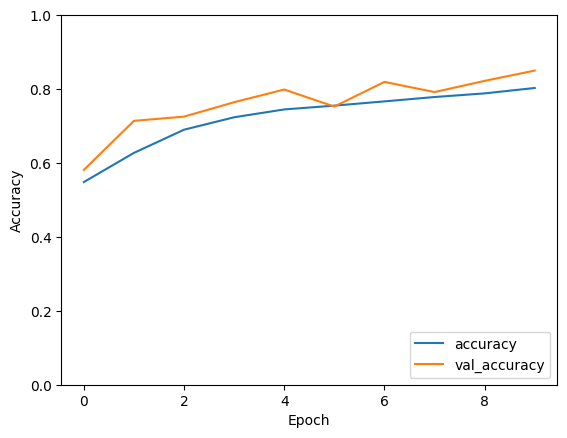

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
